In [2]:
# %%

import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
from pprint import pprint

import numpy as np
import pandas as pd
import SimpleITK as sitk
from tqdm import tqdm
import sys
from pathlib import Path


from pathlib import Path
import pyrootutils

import torch.nn as nn
import hydra

import numpy as np
import torch
from omegaconf import  OmegaConf
from pytorch_lightning import LightningModule

from tqdm import tqdm
import pandas as pd
import src.utils.default as utils
import SimpleITK as sitk
sitk.ProcessObject_SetGlobalWarningDisplay(False)
from src.data.bvisa_dm import CS_Dataset

import SimpleITK as sitk

from src.data.bvisa_dm import CS_Dataset

import matplotlib.pyplot as plt

from monai.metrics import compute_dice, compute_hausdorff_distance, compute_iou

# %% [markdown]
# # Load segmentation model

# %%
CHKP = Path('/mrhome/vladyslavz/git/central-sulcus-analysis/logs_finetuning/CS1x_via11SegmSST_monaiUnet-fullFinetune/runs/2023-05-24_11-16-51/checkpoints/epoch-253-Esubj-0.4463.ckpt')
print(CHKP)
out_path = Path('/mrhome/vladyslavz/git/central-sulcus-analysis/data/via11/nobackup/segm_results/skull_stripped_images')

exp_name = CHKP.parent.parent.parent.parent.name
out_path = out_path / exp_name
out_path.mkdir(exist_ok=True, parents=True)
cgf_path = CHKP.parent.parent / '.hydra' / 'config.yaml'
finetune_cfg = OmegaConf.load(cgf_path)

segm_model: LightningModule = hydra.utils.instantiate(finetune_cfg.model)
# sst_ds = hydra.utils.instantiate(finetune_cfg.data)
# print(finetune_cfg.data)
segm_model = segm_model.load_from_checkpoint(CHKP).to('cuda')
segm_model = segm_model.eval()


# %% [markdown]
# # Load via validation images

# %% USE ONLY FOR 1X DATASET
# finetune_cfg.data.dataset_cfg.resample = [1, 1, 1.4]


# %%
croppadd2same_size =  finetune_cfg.data.dataset_cfg.get('padd2same_size') if finetune_cfg.data.dataset_cfg.get('padd2same_size') else finetune_cfg.data.dataset_cfg.get('croppadd2same_size')

# %%
via11DS = CS_Dataset('via11', 'mp2rage_skull_stripped',
                    'bvisa_CS', dataset_path='',
                     split='only_good',
                     crop2content=True,
                     preload=False,
                     resample=finetune_cfg.data.dataset_cfg.resample,
                     croppadd2same_size=croppadd2same_size)

eval_sample = via11DS[0]

/mrhome/vladyslavz/git/central-sulcus-analysis/logs_finetuning/CS1x_via11SegmSST_monaiUnet-fullFinetune/runs/2023-05-24_11-16-51/checkpoints/epoch-253-Esubj-0.4463.ckpt
Loading encoder weights from checkpoint...
/mrhome/vladyslavz/git/central-sulcus-analysis/logs_sst/via11-monai-BasicUnet-bvisaSim-skullstripped-SEGM1x/runs/2023-05-24_00-32-24/checkpoints/epoch-236_val_loss-0.217.ckpt


Attribute 'unet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['unet'])`.
Attribute 'segm_loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['segm_loss'])`.
Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.
Attribute 'loss_function' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss_function'])`.


U-Net Embedding dimension: 49152
Loading encoder weights from checkpoint...
/mrhome/vladyslavz/git/central-sulcus-analysis/logs_sst/via11-monai-BasicUnet-bvisaSim-skullstripped-SEGM1x/runs/2023-05-24_00-32-24/checkpoints/epoch-236_val_loss-0.217.ckpt
U-Net Embedding dimension: 49152


In [14]:
segm_ds = hydra.utils.instantiate(finetune_cfg.data).train_dataset
segm_sample = segm_ds[2]

2023-05-25 11:30:54,278 - Len of train examples 38 len of validation examples 12


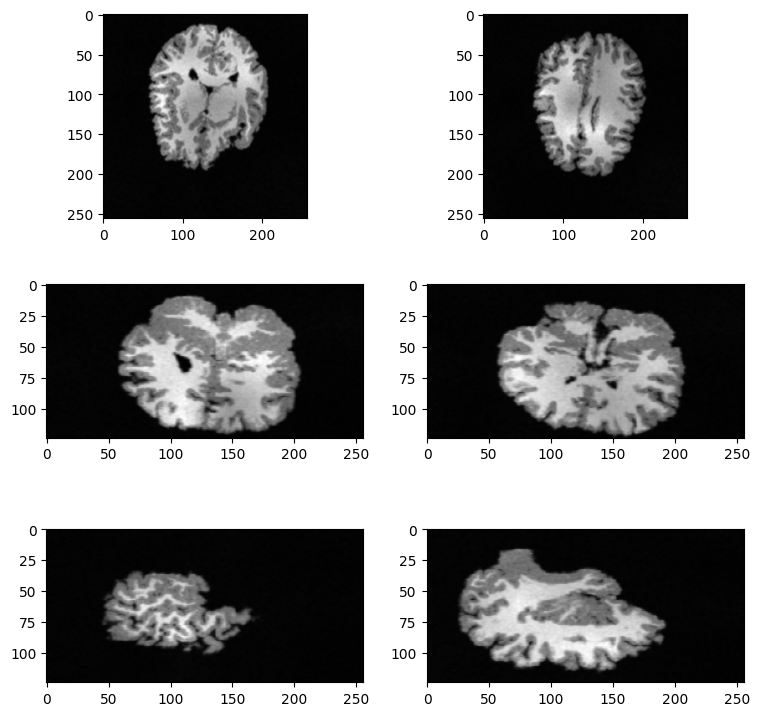

In [15]:

fig, ax = plt.subplots(3, 2, figsize=(9, 9))
slc = 70
shift = 20
img = segm_sample['image'].numpy()
ax[0, 0].imshow(img[0, slc, :, :], cmap='gray')
ax[0, 1].imshow(img[0, slc+shift, :, :], cmap='gray')
ax[1, 0].imshow(img[0, :, slc, :], cmap='gray')
ax[1, 1].imshow(img[0, :, slc+shift, :], cmap='gray')
ax[2, 0].imshow(img[0, :, :, slc,], cmap='gray')
ax[2, 1].imshow(img[0, :, :, slc+shift,], cmap='gray')
plt.show()

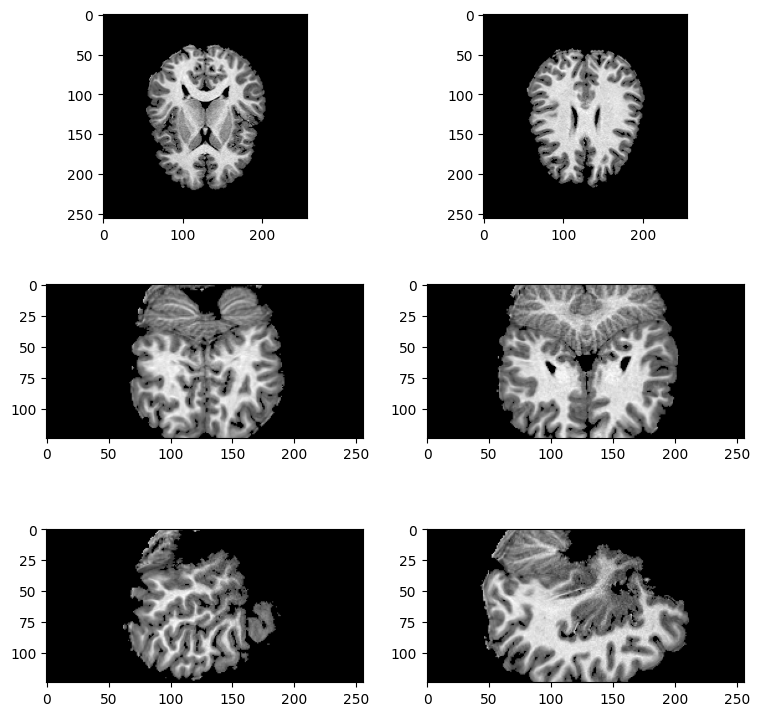

In [17]:

fig, ax = plt.subplots(3, 2, figsize=(9, 9))
slc = 70
shift = 20
img = eval_sample['image'].numpy()
ax[0, 0].imshow(img[0, slc, :, :], cmap='gray')
ax[0, 1].imshow(img[0, slc+shift, :, :], cmap='gray')
ax[1, 0].imshow(img[0, :, slc, :], cmap='gray')
ax[1, 1].imshow(img[0, :, slc+shift, :], cmap='gray')
ax[2, 0].imshow(img[0, :, :, slc,], cmap='gray')
ax[2, 1].imshow(img[0, :, :, slc+shift,], cmap='gray')
plt.show()